In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/fake_job_postings.csv')

# Print the first few rows of the dataset
print(df.head())  # Displays the first 5 rows by default


   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:

#BERT dependencies
!pip install -q tensorflow-text
!pip install -q tf-models-official


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 

In [ ]:
# Install dependencies
!pip install -q tensorflow-text
!pip install -q tf-models-official

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Ensure you have this for text processing
from official.nlp import optimization  # For creating the AdamW optimizer

# Set logger level to suppress warnings
tf.get_logger().setLevel('ERROR')

# Define the URLs for the models
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Load the preprocessing model
bert_preprocess_model = hub.KerasLayer(preprocess_bert)

# Sample input text for processing
text_test1 = ["Sample job posting text here."]

# Preprocess the text
text_preprocessed = bert_preprocess_model(text_test1)

# Inspect the keys and output shapes
print(f'Keys            : {list(text_preprocessed.keys())}')
print(f'Word Ids Shape  : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids        : {text_preprocessed["input_word_ids"][0, :30]}')
print(f'Input Mask Shape: {text_preprocessed["input_mask"].shape}')
print(f'Input Mask      : {text_preprocessed["input_mask"][0, :30]}')
print(f'Type Ids Shape  : {text_preprocessed["input_type_ids"].shape}')
print(f'Type Ids        : {text_preprocessed["input_type_ids"][0, :30]}')

# Load the BERT encoder model
bert_model = hub.KerasLayer(small_bert_encoder)

# Get BERT results (sequence and pooled outputs)
bert_results = bert_model(text_preprocessed)

# Inspect BERT outputs
print(f'Pooled Outputs Shape: {bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values: {bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape: {bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values: {bert_results["sequence_output"][0, :12]}')

# Now, let's define a function for preprocessing (no need to pass arguments)
def make_bert_preprocess_model():
    # Load the BERT preprocessing model from TensorFlow Hub
    bert_preprocess_model = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

    # Tokenize and preprocess the input text
    def preprocess_input(input_segments):
        # Convert the list of strings into a tf.Tensor (string type)
        input_tensor = tf.constant(input_segments, dtype=tf.string)
        return bert_preprocess_model(input_tensor)

    return preprocess_input

# Example input: A list of text sentences
train_text1 = ["Job title: Software Engineer",
               "Location: Hyderabad",
               "Description: Develop software applications."]
preproc_model1 = make_bert_preprocess_model()  # Don't pass any arguments here
preproc1 = preproc_model1(train_text1)  # Pass the input text directly

# Print the preprocessed input to see the output
print('Preprocessed input:')
print('Keys           : ', list(preproc1.keys()))
print('Shape Word Ids : ', preproc1['input_word_ids'].shape)
print('Word Ids       : ', preproc1['input_word_ids'][0, :20])
print('Shape Mask     : ', preproc1['input_mask'].shape)
print('Input Mask     : ', preproc1['input_mask'][0, :20])
print('Shape Type Ids : ', preproc1['input_type_ids'].shape)
print('Type Ids       : ', preproc1['input_type_ids'][0, :20])

# Example usage: Preprocessing for other data
train_text2 = ["Category: Full-time", "Skills: Python, TensorFlow"]

# Preprocess the second set of text
preproc_model2 = make_bert_preprocess_model()  # Reusing the function without arguments
preproc2 = preproc_model2(train_text2)  # Pass the input text directly

# Inspect the preprocessed data
print('Preprocessed second set of data:')
print('Keys           : ', list(preproc2.keys()))
print('Shape Word Ids : ', preproc2['input_word_ids'].shape)
print('Word Ids       : ', preproc2['input_word_ids'][0, :20])
print('Shape Mask     : ', preproc2['input_mask'].shape)
print('Input Mask     : ', preproc2['input_mask'][0, :20])
print('Shape Type Ids : ', preproc2['input_type_ids'].shape)
print('Type Ids       : ', preproc2['input_type_ids'][0, :20])

# Define the BERT model architecture (for further fine-tuning or training)
bert_model = hub.KerasLayer(small_bert_encoder)

# Train or fine-tune with the BERT outputs and preprocessed inputs
bert_results1 = bert_model(preproc1)
bert_results2 = bert_model(preproc2)

# Inspect the BERT outputs for both sets
print(f'Pooled Outputs Shape for 1st input: {bert_results1["pooled_output"].shape}')
print(f'Sequence Outputs Shape for 1st input: {bert_results1["sequence_output"].shape}')
print(f'Pooled Outputs Shape for 2nd input: {bert_results2["pooled_output"].shape}')
print(f'Sequence Outputs Shape for 2nd input: {bert_results2["sequence_output"].shape}')

Keys            : ['input_type_ids', 'input_mask', 'input_word_ids']
Word Ids Shape  : (1, 128)
Word Ids        : [  101  7099  3105 14739  3793  2182  1012   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
Input Mask Shape: (1, 128)
Input Mask      : [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Type Ids Shape  : (1, 128)
Type Ids        : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pooled Outputs Shape: (1, 512)
Pooled Outputs Values: [ 0.99829954  0.97224635  0.08400374 -0.04700523  0.2605229   0.9917809
  0.9967967  -0.9961479  -0.01744059 -0.9782463   0.17836556 -0.9917151 ]
Sequence Outputs Shape: (1, 128, 512)
Sequence Outputs Values: [[ 0.15119742 -0.40400547 -0.18626931 ... -0.9831214   1.0123742
   0.66114783]
 [-0.2428975  -0.0285762   0.12155065 ... -0.38848096  0.7339471
   0.44286346]
 [ 0.19696024 -0.5034062   0.13748857 ... -0.41291922 -0.6432123


In [ ]:
###Token frequenecy

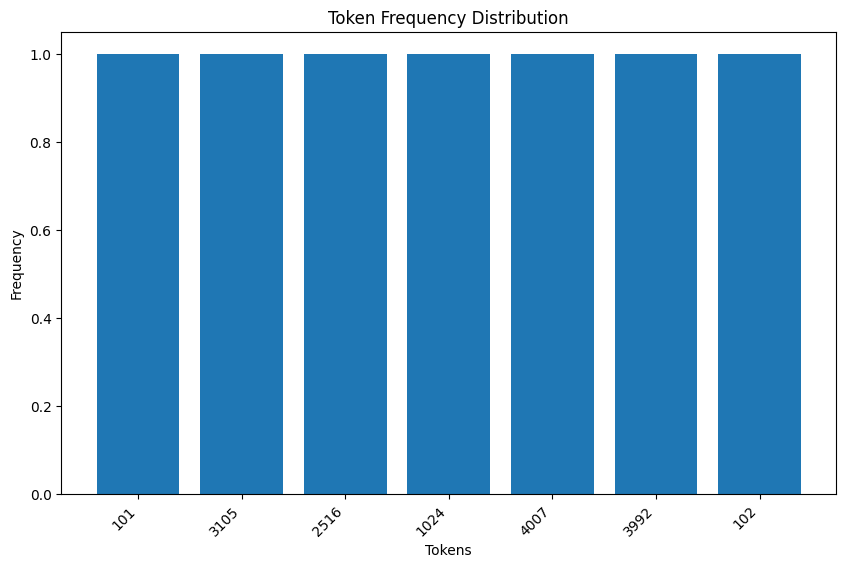

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # For text preprocessing

# Define the URLs for the models
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load the preprocessing model from TensorFlow Hub
bert_preprocess_model = hub.KerasLayer(preprocess_bert)

# Sample input text for processing
text_test = ["Job title: Software Engineer", "Location: Hyderabad", "Description: Develop software applications."]

# Preprocess the text
text_preprocessed = bert_preprocess_model(text_test)

# Extract input word IDs (tokenized words) from the preprocessed text
input_word_ids = text_preprocessed['input_word_ids']

# Convert the tokenized words to numpy arrays for further processing
word_ids = input_word_ids.numpy()

# Load the BERT encoder model from TensorFlow Hub
bert_model = hub.KerasLayer(small_bert_encoder)

# Get BERT results (sequence output)
bert_results = bert_model(text_preprocessed)
sequence_output = bert_results['sequence_output']

# Function to visualize the frequency of tokens in the input text
def plot_token_frequencies(word_ids, word_to_token_map):
    # Convert word IDs back to words using the BERT tokenizer
    tokens = [word_to_token_map[i] for i in word_ids[0] if i != 0]  # Remove padding tokens (ID 0)

    # Count token frequencies
    token_freq = {}
    for token in tokens:
        if token not in token_freq:
            token_freq[token] = 1
        else:
            token_freq[token] += 1

    # Sort by frequency
    sorted_tokens = sorted(token_freq.items(), key=lambda item: item[1], reverse=True)
    tokens, frequencies = zip(*sorted_tokens)

    # Plot the frequencies in a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(tokens, frequencies)
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Token Frequency Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage: Visualize the token frequency from the preprocessed text
# Create a mapping of token IDs to token strings
word_to_token_map = {i: str(i) for i in range(30522)}  # Example map for demo purposes
plot_token_frequencies(word_ids, word_to_token_map)


In [ ]:
#########confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


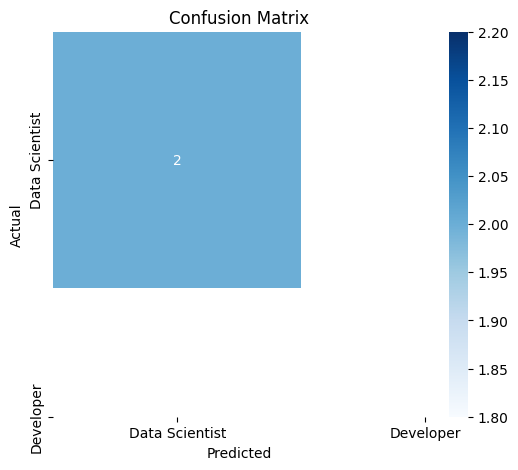

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the BERT preprocessing and encoding model
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for classification (could be job descriptions, etc.)
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Sample labels (let's assume binary classification: 1 = Developer, 0 = Data Scientist)
labels = [1, 1, 0, 1, 1, 1]

# Preprocess the texts
text_preprocessed = bert_preprocess_model(texts)

# Get BERT embeddings (sequence_output can be used for the sentence embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Train a simple Logistic Regression model using the BERT embeddings
X_train, X_test, y_train, y_test = train_test_split(embeddings.numpy(), labels, test_size=0.3, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Data Scientist', 'Developer'], yticklabels=['Data Scientist', 'Developer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#########covariance matirx

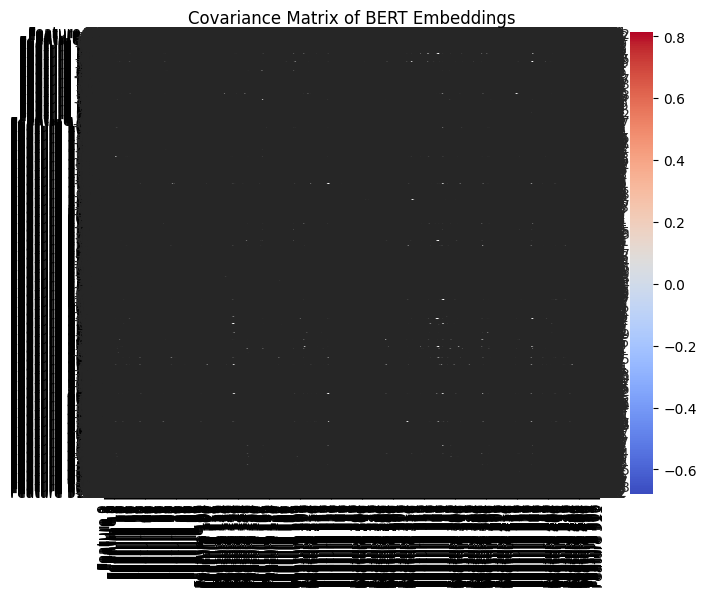

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Define the BERT preprocessing and encoding model
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for processing
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Preprocess the texts
text_preprocessed = bert_preprocess_model(texts)

# Get BERT embeddings (sequence_output can be used for the sentence embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Compute the covariance matrix of the embeddings
cov_matrix = np.cov(embeddings.numpy(), rowvar=False)

# Plot the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=[f'Feature {i}' for i in range(embeddings.shape[1])],
            yticklabels=[f'Feature {i}' for i in range(embeddings.shape[1])])
plt.title('Covariance Matrix of BERT Embeddings')
plt.show()


In [ ]:

###3Line Plot of BERT Embeddings Over Time

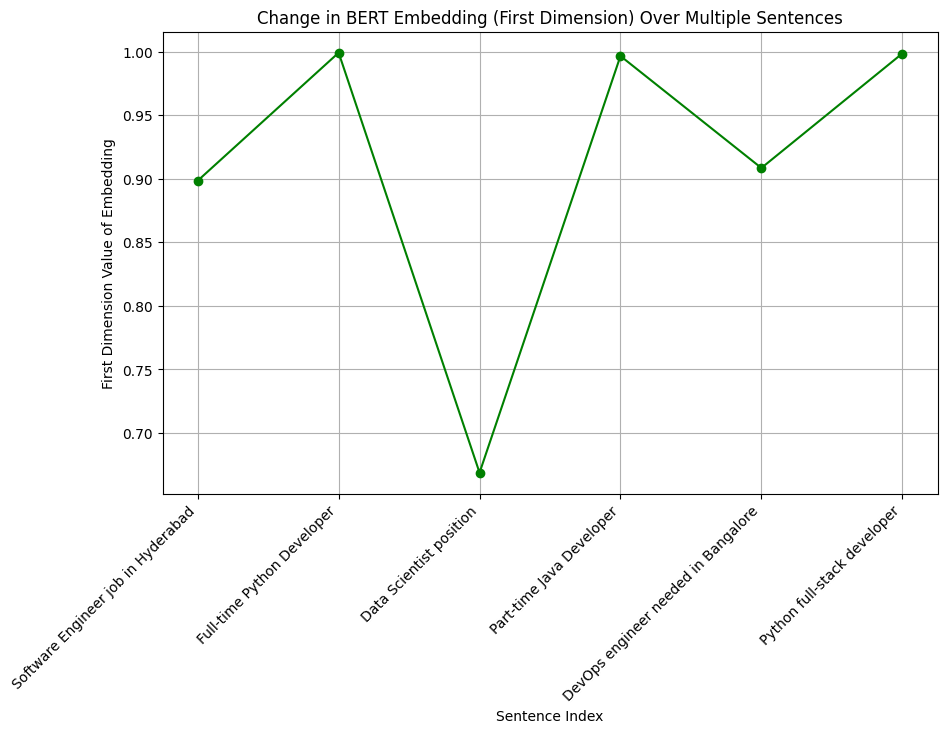

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

# Define BERT preprocessing and encoding models
preprocess_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
small_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'

# Load BERT preprocessing and encoder models
bert_preprocess_model = hub.KerasLayer(preprocess_bert)
bert_model = hub.KerasLayer(small_bert_encoder)

# Sample input text for processing
texts = ["Software Engineer job in Hyderabad", "Full-time Python Developer", "Data Scientist position",
         "Part-time Java Developer", "DevOps engineer needed in Bangalore", "Python full-stack developer"]

# Preprocess the text input using the BERT preprocessing model
text_preprocessed = bert_preprocess_model(texts)

# Extract BERT embeddings (using 'pooled_output' for sentence-level embeddings)
bert_results = bert_model(text_preprocessed)
embeddings = bert_results['pooled_output']

# Extract the first dimension (you can select other dimensions if needed)
first_dim_values = embeddings.numpy()[:, 0]  # Getting values from the first dimension (dim=0)

# Plotting the change in the first dimension of the embeddings over multiple text inputs
plt.figure(figsize=(10, 6))
plt.plot(range(len(texts)), first_dim_values, marker='o', linestyle='-', color='g')
plt.title('Change in BERT Embedding (First Dimension) Over Multiple Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('First Dimension Value of Embedding')
plt.xticks(range(len(texts)), texts, rotation=45, ha="right")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/fake_job_postings.csv")

# check if data is loaded.
df.sample (frac=0.02)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
4044,4045,Art Director,"US, NY, Brooklyn",Design,NaN,AREA 17 is an interactive agency. We take an i...,We seek an Art Director with a strong web and ...,Required Skills:3-5 years of experience design...,Generous Health and Dental PackageMetroCard Pr...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Design,0
5266,5267,"Telecommunications Lead Technician, 3rd Shift","US, AZ, Phoenix",Retail,NaN,Tel Tech Networks is a Voice/Data/Video/Securi...,"Job Description:Installs, troubleshoots, repai...","3+ years telecommunications experience, or 3+ ...",TBD,0,1,1,NaN,NaN,NaN,NaN,NaN,0
6149,6150,SQL Database Developer,"GB, LND, Wimbledon",Development,35000-45000,Abel &amp; Cole is an award-winning online foo...,We are seeking an experienced SQL developer to...,Expert working knowledge of SQL Server 2005+ w...,Salary: 35k-45k (depending on experience)Othe...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Information Technology,0
12757,12758,Regional Manager,"GB, , Leeds",Operations,NaN,Our mission is to bring the world's best-loved...,Our mission is to bring the world's best-loved...,"This role demands an aggressive, entrepreneuri...",Attractive compensation package consisting of ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
8585,8586,ER Trauma RN,"US, NV,",NaN,NaN,NaN,Find more jos at #URL_1efb08d6a6da1c56afb2d0c6...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2436,Software Developer Ruby on Rails,"US, NY, New York",IT,NaN,MAP Digital: MetaMeetings is a digital events ...,MAP Digital: MetaMeetings(tm) is seeking an ex...,You have advanced Ruby on Rails and RESTful ar...,NaN,0,1,1,NaN,Mid-Senior level,NaN,Staffing and Recruiting,NaN,0
17014,17015,Escrow Officer / Closer,"US, FL, Jacksonville",NaN,NaN,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,NaN,Real Estate,NaN,0
11229,11230,SQL Database Analyst (Remote),"US, VA, Herndon",NaN,0-0,"S2scout, is a Pittsburgh-based talent aquisiti...",We're seeking a SQL Database Analyst residing ...,4+ years of experience writing stored procedu...,NaN,1,1,0,Contract,Mid-Senior level,Bachelor's Degree,Professional Training & Coaching,Information Technology,0
1036,1037,Scrum Master,"GB, , London",NaN,NaN,NaN,We’re looking for a Scrum Master to help us gu...,You will be a Certified Scrum MasterYou have e...,BonusEquityPrivate HealthareGym SubsidyFree Br...,0,0,1,Full-time,NaN,Bachelor's Degree,E-Learning,Project Management,0


In [ ]:

def transposed_display(df):
     with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
              display(df)
#               df.head(5)

In [ ]:
transposed_display(df.tail().transpose())

,17875,17876,17877,17878,17879
job_id,17876,17877,17878,17879,17880
title,Account Director - Distribution,Payroll Accountant,Project Cost Control Staff Engineer - Cost Con...,Graphic Designer,Web Application Developers
location,"CA, ON, Toronto","US, PA, Philadelphia","US, TX, Houston","NG, LA, Lagos","NZ, N, Wellington"
department,Sales,Accounting,NaN,NaN,Engineering
salary_range,NaN,NaN,NaN,NaN,NaN
company_profile,Vend is looking for some awesome new talent to...,WebLinc is the e-commerce platform and service...,We Provide Full Time Permanent Positions for m...,NaN,Vend is looking for some awesome new talent to...
description,Just in case this is the first time you’ve vis...,The Payroll Accountant will focus primarily on...,Experienced Project Cost Control Staff Enginee...,Nemsia Studios is looking for an experienced v...,Who are we?Vend is an award winning web based ...
requirements,To ace this role you:Will eat comprehensive St...,- B.A. or B.S. in Accounting- Desire to have f...,At least 12 years professional experience.Abil...,1. Must be fluent in the latest versions of Co...,We want to hear from you if:You have an in-dep...
benefits,What can you expect from us?We have an open cu...,Health &amp; WellnessMedical planPrescription ...,NaN,Competitive salary (compensation will be based...,NaN
telecommuting,0,0,0,0,0


In [ ]:

df.shape

(17880, 18)

In [ ]:

df.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [ ]:
# Missing data
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:

df.isna().sum() / len(df)

,0
job_id,0.000000
title,0.000000
location,0.019351
department,0.645805
salary_range,0.839597
company_profile,0.185011
description,0.000056
requirements,0.150783
benefits,0.403356
telecommuting,0.000000


In [ ]:
df.columns[df.isnull().mean() < 0.4]

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:

df['job_id'].dtypes
df.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)

In [ ]:
"""Extracting Text Featurs"""

text_df = df[["title", "company_profile", "description", "requirements","fraudulent"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [ ]:
"""Catagorical Feature"""
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# seeing the distribution of the target variable
df['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


<ipython-input-26-60366b279146>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


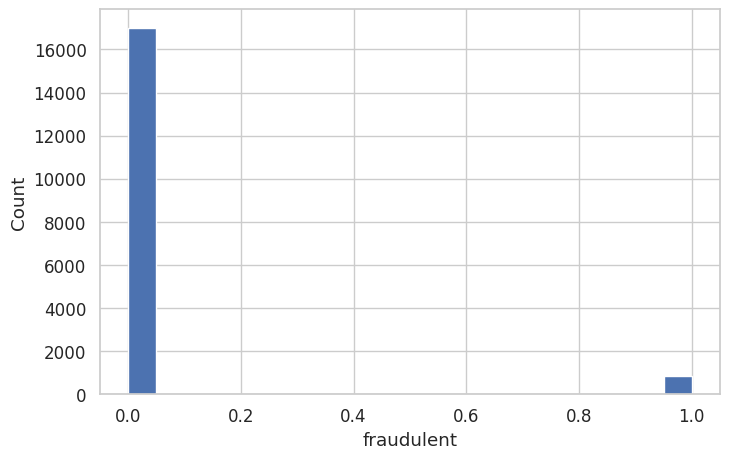

In [ ]:
#visualization seaborn
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['fraudulent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='fraudulent', ylabel='Count');



TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

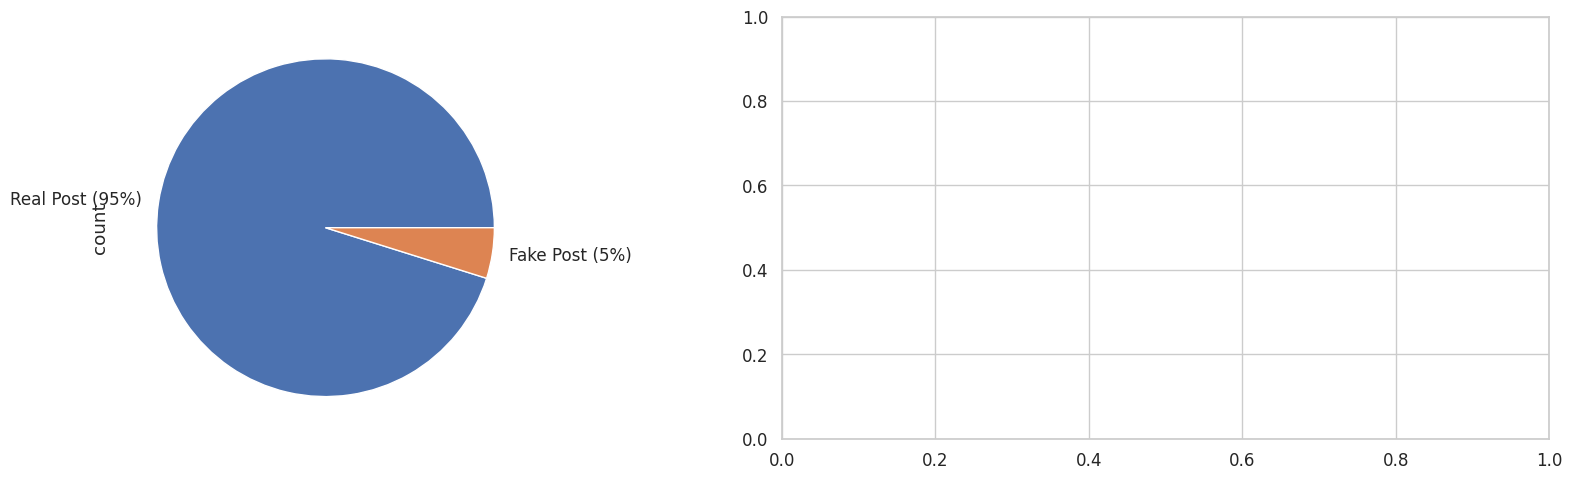

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

CPU times: user 20.6 s, sys: 1.41 s, total: 22.1 s
Wall time: 30.7 s


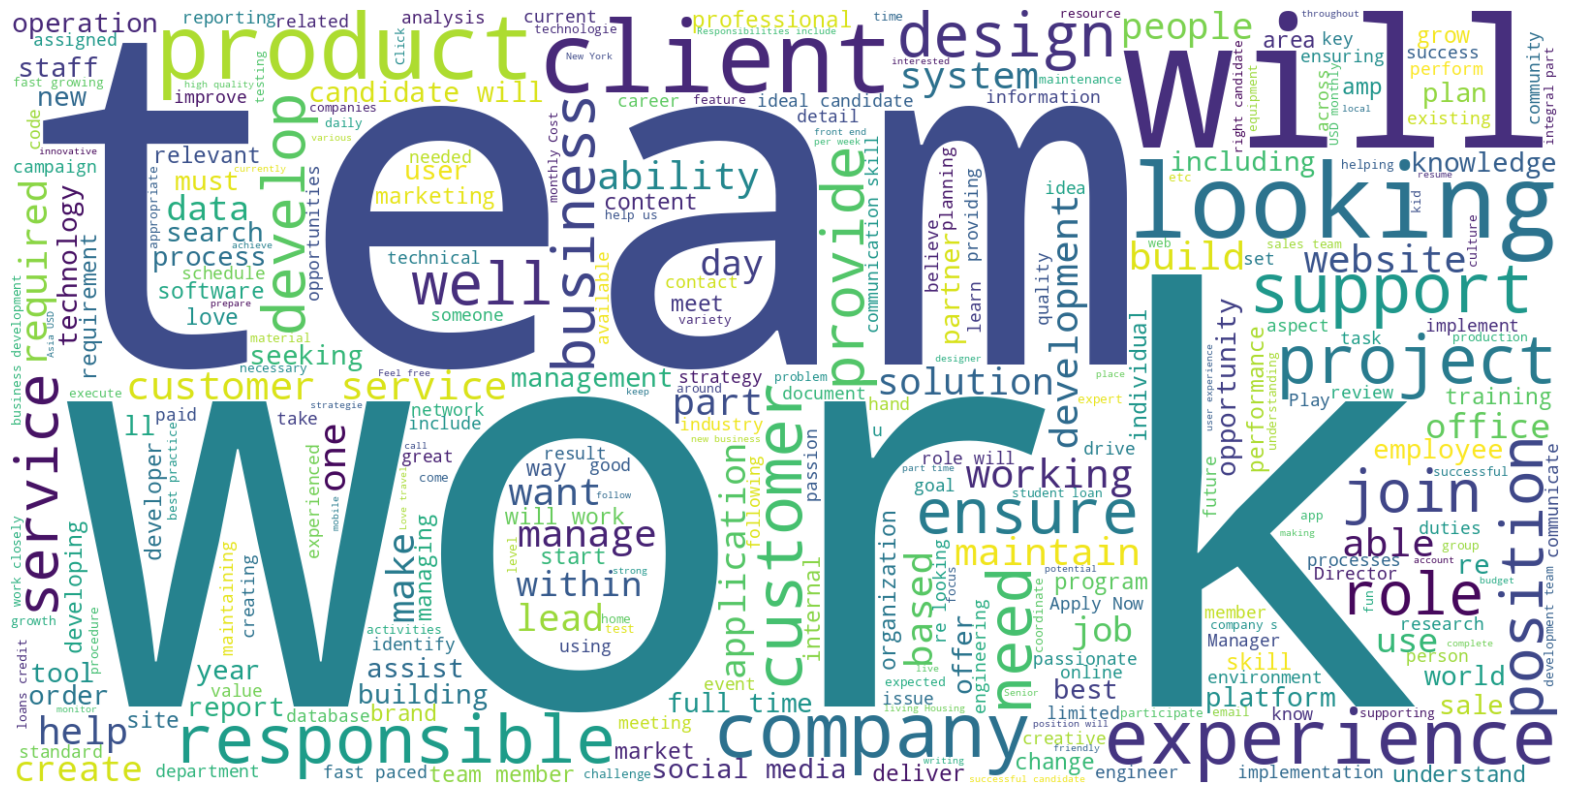

In [ ]:
%%time

# word cloud visualization based on the frequency
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('no_fraud_cloud.jpeg')

In [ ]:


df['text'] = df['title'] + ' ' + df['location'] + ' ' + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' '  + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [ ]:
df['text']

,text
0,NaN
1,NaN
2,NaN
3,"Account Executive - Washington DC US, DC, Wash..."
4,"Bill Review Manager US, FL, Fort Worth SpotSo..."
...,...
17875,NaN
17876,"Payroll Accountant US, PA, Philadelphia WebLi..."
17877,NaN
17878,NaN


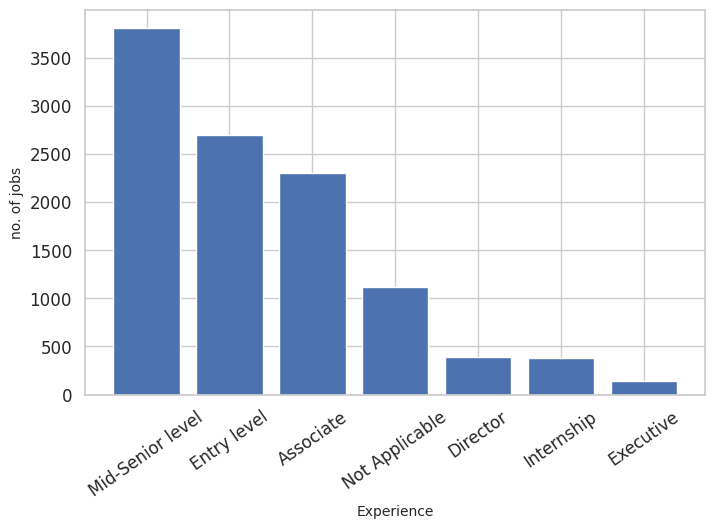

In [ ]:
experience = dict(df.required_experience.value_counts())
plt.bar(experience.keys(), experience.values())
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

<ipython-input-33-0686097e98d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df.location.apply(extract_country)


country,AE,AL,AM,AR,AT,AU,BD,BE,BG,BH,BR,BY,CA,CH,CL,CM,CN,CO,CY,CZ,DE,DK,EE,EG,ES,FI,FR,GB,GH,GR,HK,HR,HU,ID,IE,IL,IN,IQ,IS,IT,JM,JP,KE,KH,KR,KW,KZ,LK,LT,LU,LV,MA,MT,MU,MX,MY,NG,NI,NL,NO,NZ,PA,PE,PH,PK,PL,PT,QA,RO,RS,RU,SA,SD,SE,SG,SI,SK,SV,TH,TN,TR,TT,TW,UA,UG,US,VI,VN,ZA,ZM
fraudulent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,53,1,2,9,14,174,2,117,17,4,35,9,445,15,2,1,15,1,11,6,383,42,71,51,65,29,70,2361,1,940,77,1,14,12,114,72,272,10,2,31,1,20,7,1,10,2,1,2,23,9,6,1,13,14,18,9,10,4,127,8,333,9,1,131,26,73,18,15,46,7,20,14,1,49,80,1,2,1,10,2,17,4,2,13,1,9926,3,4,39,2
1,1,0,0,0,0,40,0,0,0,5,1,0,12,0,0,0,0,0,0,0,0,0,1,1,1,0,0,23,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,1,1,3,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,730,0,0,1,0


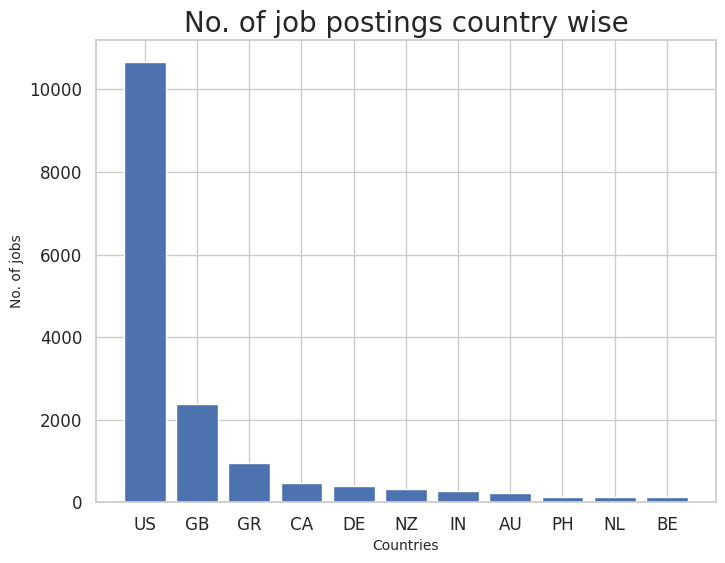

In [ ]:
def extract_country(location):

    l = location.split(',')
    return l[0]

df = df[df['location'].notnull()]
df['country'] = df.location.apply(extract_country)
country = dict(df.country.value_counts()[:11])

plt.figure(figsize=(8,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

# We use crosstab to deal with categorical values
pd.set_option('display.max_columns', None)
ct = pd.crosstab(df.country,df.fraudulent)
ct.transpose()